In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('data\한국전력공사_지역별 전기차 현황정보_20240731.csv')
df

,기준일,서울,인천,경기,강원,충북,충남,대전,세종,경북,대구,전북,전남,광주,경남,부산,울산,제주
0,2023-04-30,62385,29464,87779,15218,16996,19487,15301,3444,22349,26092,15852,19169,10028,26661,26191,6050,35020
1,2023-05-31,63807,30905,90624,15728,17511,20225,15564,3562,23023,26691,16256,19966,10303,27593,27147,6207,35619
2,2023-06-30,65614,32065,93995,16143,17903,20677,15904,3674,23520,27263,16668,20874,10609,28799,28466,6492,36262
3,2023-07-31,66528,33248,97738,16459,18100,21437,16138,3778,24347,27911,17302,21368,10853,30888,29037,6813,36903
4,2023-08-31,67351,34094,99925,16723,18739,21656,16263,3882,24645,28336,17623,21708,11054,31767,30148,6960,37342
5,2023-09-30,68892,35554,103704,17014,19095,22065,16559,4073,25051,28988,18187,22317,11318,32763,31096,7120,37689
6,2023-10-31,70194,36901,107342,17363,19416,23156,16841,4186,25664,29586,18658,22992,11757,34005,32418,7331,38098
7,2023-11-30,71591,38551,111466,17927,19713,23558,17418,4235,26234,30272,19390,23746,12235,35124,33770,7688,38894
8,2023-12-31,72937,40397,114117,18236,19972,24130,17889,4393,26776,30396,19795,24200,12538,36225,34643,7838,39418
9,2024-01-31,72877,40845,114735,18247,20003,24194,17981,4430,26934,30396,19827,24276,12529,36410,34789,7875,39439


In [3]:
df.melt(id_vars=['기준일'])

,기준일,variable,value
0,2023-04-30,서울,62385
1,2023-05-31,서울,63807
2,2023-06-30,서울,65614
3,2023-07-31,서울,66528
4,2023-08-31,서울,67351
...,...,...,...
216,2023-12-31,제주,39418
217,2024-01-31,제주,39439
218,2024-05-31,제주,41519
219,2024-06-30,제주,42436


In [6]:
df_melt=df.melt(id_vars=['기준일'],var_name='지역',value_name='자동차수')
df_melt.head()

,기준일,지역,자동차수
0,2023-04-30,서울,62385
1,2023-05-31,서울,63807
2,2023-06-30,서울,65614
3,2023-07-31,서울,66528
4,2023-08-31,서울,67351


In [7]:
# 연도별, 월별, 분기별 지역에 대한 분석: 파생변수 이용하여 '연', '월' 만들기

df_melt['기준일'].str.split('-')

0      [2023, 04, 30]
1      [2023, 05, 31]
2      [2023, 06, 30]
3      [2023, 07, 31]
4      [2023, 08, 31]
            ...      
216    [2023, 12, 31]
217    [2024, 01, 31]
218    [2024, 05, 31]
219    [2024, 06, 30]
220    [2024, 07, 31]
Name: 기준일, Length: 221, dtype: object

In [8]:
df_melt['기준일'].str.split('-',expand=True)

,0,1,2
0,2023,04,30
1,2023,05,31
2,2023,06,30
3,2023,07,31
4,2023,08,31
...,...,...,...
216,2023,12,31
217,2024,01,31
218,2024,05,31
219,2024,06,30


In [9]:
df_melt[['연','월','일']]=df_melt['기준일'].str.split('-',expand=True)
df_melt

,기준일,지역,자동차수,연,월,일
0,2023-04-30,서울,62385,2023,04,30
1,2023-05-31,서울,63807,2023,05,31
2,2023-06-30,서울,65614,2023,06,30
3,2023-07-31,서울,66528,2023,07,31
4,2023-08-31,서울,67351,2023,08,31
...,...,...,...,...,...,...
216,2023-12-31,제주,39418,2023,12,31
217,2024-01-31,제주,39439,2024,01,31
218,2024-05-31,제주,41519,2024,05,31
219,2024-06-30,제주,42436,2024,06,30


In [11]:
# sol2: 슬라이싱
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     221 non-null    object
 1   지역      221 non-null    object
 2   자동차수    221 non-null    int64 
 3   연       221 non-null    object
 4   월       221 non-null    object
 5   일       221 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.5+ KB


In [13]:
df_melt['연도']=df_melt['기준일'].str[:4]
df_melt

,기준일,지역,자동차수,연,월,일,연도
0,2023-04-30,서울,62385,2023,04,30,2023
1,2023-05-31,서울,63807,2023,05,31,2023
2,2023-06-30,서울,65614,2023,06,30,2023
3,2023-07-31,서울,66528,2023,07,31,2023
4,2023-08-31,서울,67351,2023,08,31,2023
...,...,...,...,...,...,...,...
216,2023-12-31,제주,39418,2023,12,31,2023
217,2024-01-31,제주,39439,2024,01,31,2024
218,2024-05-31,제주,41519,2024,05,31,2024
219,2024-06-30,제주,42436,2024,06,30,2024


In [14]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     221 non-null    object
 1   지역      221 non-null    object
 2   자동차수    221 non-null    int64 
 3   연       221 non-null    object
 4   월       221 non-null    object
 5   일       221 non-null    object
 6   연도      221 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.2+ KB


In [15]:
# 숫자로 바꾸려면?

df_melt['연도']=df_melt['연도'].astype(int) # 여기에는 inplace와 같은 parameter가 없음
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     221 non-null    object
 1   지역      221 non-null    object
 2   자동차수    221 non-null    int64 
 3   연       221 non-null    object
 4   월       221 non-null    object
 5   일       221 non-null    object
 6   연도      221 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 12.2+ KB


# 1. 지역별, 연도별 분석

In [16]:
df_melt.head()

,기준일,지역,자동차수,연,월,일,연도
0,2023-04-30,서울,62385,2023,04,30,2023
1,2023-05-31,서울,63807,2023,05,31,2023
2,2023-06-30,서울,65614,2023,06,30,2023
3,2023-07-31,서울,66528,2023,07,31,2023
4,2023-08-31,서울,67351,2023,08,31,2023


In [17]:
df_melt.groupby(['지역','연'])[['자동차수']].mean()

자동차수
지역 연                  
강원 2023   16756.777778
   2024   19032.250000
경기 2023  100743.333333
   2024  126903.000000
경남 2023   31536.111111
   2024   40523.750000
경북 2023   24623.222222
   2024   29210.500000
광주 2023   11188.333333
   2024   13262.500000
대구 2023   28392.777778
   2024   31693.000000
대전 2023   16430.777778
   2024   19073.750000
부산 2023   30324.000000
   2024   38274.500000
서울 2023   67699.888889
   2024   76797.750000
세종 2023    3914.111111
   2024    4695.500000
울산 2023    6944.333333
   2024    8463.000000
인천 2023   34575.444444
   2024   45187.750000
전남 2023   21815.555556
   2024   26836.250000
전북 2023   17747.888889
   2024   21420.750000
제주 2023   37249.444444
   2024   41627.750000
충남 2023   21821.222222
   2024   26588.500000
충북 2023   18605.000000
   2024   21675.750000

In [18]:
df_melt.groupby(['지역','연'],as_index=False)[['자동차수']].mean()

,지역,연,자동차수
0,강원,2023,16756.777778
1,강원,2024,19032.250000
2,경기,2023,100743.333333
3,경기,2024,126903.000000
4,경남,2023,31536.111111
5,경남,2024,40523.750000
6,경북,2023,24623.222222
7,경북,2024,29210.500000
8,광주,2023,11188.333333
9,광주,2024,13262.500000


* 변수명.pivot_table(values=None,index=None,columns=None,aggfunc='mean'): parameter 간 순서는 상관없음
* values: 값으로 입력될 열
* index: 인덱스로 사용될 열
* columns: 열로 사용될 열
* aggfunc: 결과로 출력될 함수

In [20]:
# pivot_table 이용하여 그래프 그리기

year_tot=df_melt.pivot_table(index='지역',columns='연',values='자동차수',aggfunc='mean')
year_tot

연,2023,2024
지역,,
강원,16756.777778,19032.25
경기,100743.333333,126903.00
경남,31536.111111,40523.75
경북,24623.222222,29210.50
광주,11188.333333,13262.50
대구,28392.777778,31693.00
대전,16430.777778,19073.75
부산,30324.000000,38274.50
서울,67699.888889,76797.75


In [22]:
# 소수점 재설정: round(변수명, 반올림하려는 소수점 자릿수)

year_tot=round(year_tot,1)
year_tot.head()

연,2023,2024
지역,,
강원,16756.8,19032.2
경기,100743.3,126903.0
경남,31536.1,40523.8
경북,24623.2,29210.5
광주,11188.3,13262.5


In [23]:
# pandas.plot() 이용하여 그래프 그리기
import matplotlib.pyplot as plt

<Axes: xlabel='지역'>

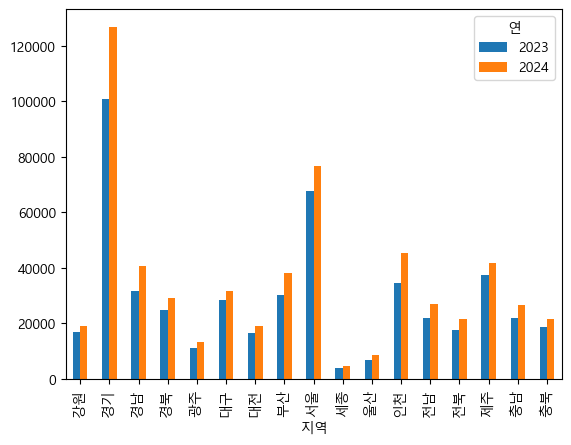

In [24]:
plt.rc('font',family='malgun gothic') # 4일 차에 이은 또 다른 한글 폰트 설정 방법

year_tot.plot(kind='bar')

<Axes: xlabel='지역'>

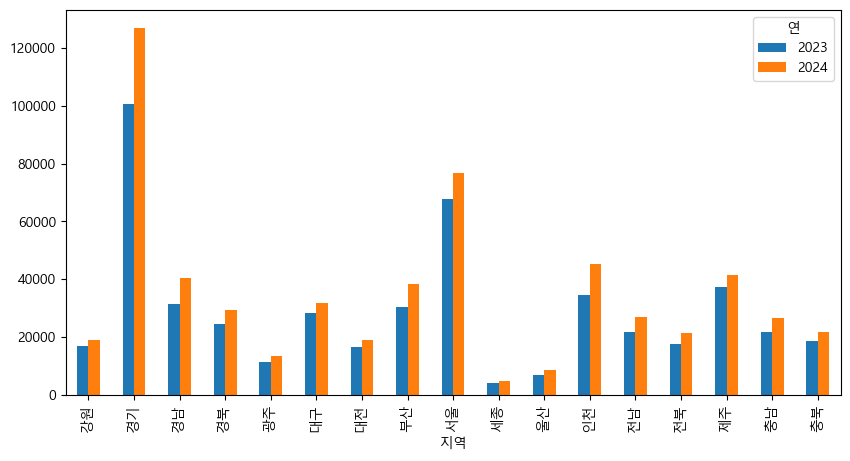

In [25]:
year_tot.plot(kind='bar',figsize=(10,5)) # figsize 단위는 인치. 근본 없네?

<Axes: xlabel='지역'>

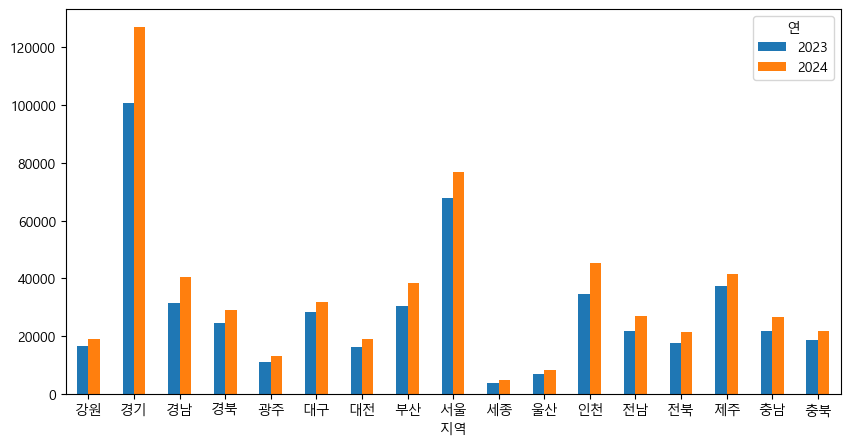

In [26]:
year_tot.plot(kind='bar',figsize=(10,5),rot=0)

# 2. 2023년 데이터 분석: 지역별, 월별 통계

In [42]:
df_melt

,기준일,지역,자동차수,연,월,일,연도
0,2023-04-30,서울,62385,2023,04,30,2023
1,2023-05-31,서울,63807,2023,05,31,2023
2,2023-06-30,서울,65614,2023,06,30,2023
3,2023-07-31,서울,66528,2023,07,31,2023
4,2023-08-31,서울,67351,2023,08,31,2023
...,...,...,...,...,...,...,...
216,2023-12-31,제주,39418,2023,12,31,2023
217,2024-01-31,제주,39439,2024,01,31,2024
218,2024-05-31,제주,41519,2024,05,31,2024
219,2024-06-30,제주,42436,2024,06,30,2024


In [28]:
df_melt['연'].unique()

array(['2023', '2024'], dtype=object)

In [30]:
df_2023=df_melt.query('연=="2023"')
df_2023

,기준일,지역,자동차수,연,월,일,연도
0,2023-04-30,서울,62385,2023,04,30,2023
1,2023-05-31,서울,63807,2023,05,31,2023
2,2023-06-30,서울,65614,2023,06,30,2023
3,2023-07-31,서울,66528,2023,07,31,2023
4,2023-08-31,서울,67351,2023,08,31,2023
...,...,...,...,...,...,...,...
212,2023-08-31,제주,37342,2023,08,31,2023
213,2023-09-30,제주,37689,2023,09,30,2023
214,2023-10-31,제주,38098,2023,10,31,2023
215,2023-11-30,제주,38894,2023,11,30,2023


In [31]:
df_2023['연'].unique()

array(['2023'], dtype=object)

In [32]:
df_2023.groupby(['지역','월'],as_index=False)[['자동차수']].mean()

,지역,월,자동차수
0,강원,04,15218.0
1,강원,05,15728.0
2,강원,06,16143.0
3,강원,07,16459.0
4,강원,08,16723.0
...,...,...,...
148,충북,08,18739.0
149,충북,09,19095.0
150,충북,10,19416.0
151,충북,11,19713.0


In [37]:
tot_2023=df_2023.pivot_table(index='지역',columns='월',values='자동차수',aggfunc='mean')
tot_2023

월,04,05,06,07,08,09,10,11,12
지역,,,,,,,,,
강원,15218.0,15728.0,16143.0,16459.0,16723.0,17014.0,17363.0,17927.0,18236.0
경기,87779.0,90624.0,93995.0,97738.0,99925.0,103704.0,107342.0,111466.0,114117.0
경남,26661.0,27593.0,28799.0,30888.0,31767.0,32763.0,34005.0,35124.0,36225.0
경북,22349.0,23023.0,23520.0,24347.0,24645.0,25051.0,25664.0,26234.0,26776.0
광주,10028.0,10303.0,10609.0,10853.0,11054.0,11318.0,11757.0,12235.0,12538.0
대구,26092.0,26691.0,27263.0,27911.0,28336.0,28988.0,29586.0,30272.0,30396.0
대전,15301.0,15564.0,15904.0,16138.0,16263.0,16559.0,16841.0,17418.0,17889.0
부산,26191.0,27147.0,28466.0,29037.0,30148.0,31096.0,32418.0,33770.0,34643.0
서울,62385.0,63807.0,65614.0,66528.0,67351.0,68892.0,70194.0,71591.0,72937.0


<Axes: xlabel='지역'>

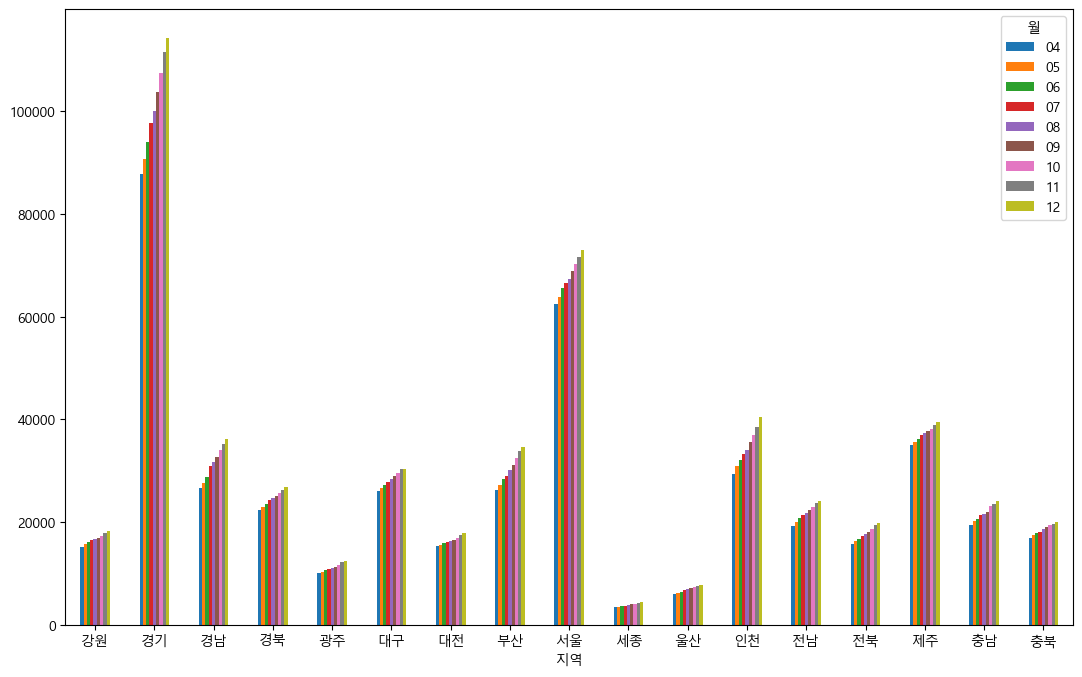

In [43]:
import matplotlib.pyplot as plt

plt.rc('font',family='malgun gothic') # 4일 차에 이은 또 다른 한글 폰트 설정 방법

tot_2023.plot(kind='bar', figsize=(13,8), rot=0) # 너무 가독성이 떨어지는데?

In [44]:
# 지역을 입력하면 그 지역만 2023년 월별 데이터 출력하게끔

tot_2023.head()

월,04,05,06,07,08,09,10,11,12
지역,,,,,,,,,
강원,15218.0,15728.0,16143.0,16459.0,16723.0,17014.0,17363.0,17927.0,18236.0
경기,87779.0,90624.0,93995.0,97738.0,99925.0,103704.0,107342.0,111466.0,114117.0
경남,26661.0,27593.0,28799.0,30888.0,31767.0,32763.0,34005.0,35124.0,36225.0
경북,22349.0,23023.0,23520.0,24347.0,24645.0,25051.0,25664.0,26234.0,26776.0
광주,10028.0,10303.0,10609.0,10853.0,11054.0,11318.0,11757.0,12235.0,12538.0


In [49]:
tot_2023.query('지역=="경기"')

월,04,05,06,07,08,09,10,11,12
지역,,,,,,,,,
경기,87779.0,90624.0,93995.0,97738.0,99925.0,103704.0,107342.0,111466.0,114117.0


In [51]:
temp=tot_2023[tot_2023.index=='경기']
temp

월,04,05,06,07,08,09,10,11,12
지역,,,,,,,,,
경기,87779.0,90624.0,93995.0,97738.0,99925.0,103704.0,107342.0,111466.0,114117.0


<Axes: xlabel='지역'>

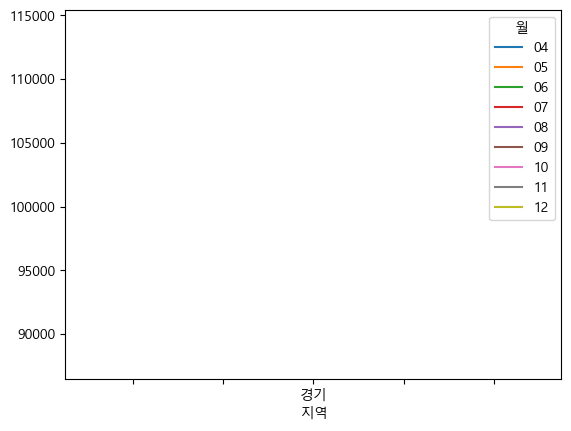

In [52]:
temp.plot()

In [55]:
# 월을 x축이 되게 하여 다시 그려 보자!: .T: 행렬의 행과 열을 서로 바꾸기(transpose!)

temp=temp.T
temp

지역,경기
월,
04,87779.0
05,90624.0
06,93995.0
07,97738.0
08,99925.0
09,103704.0
10,107342.0
11,111466.0
12,114117.0


<Axes: xlabel='월'>

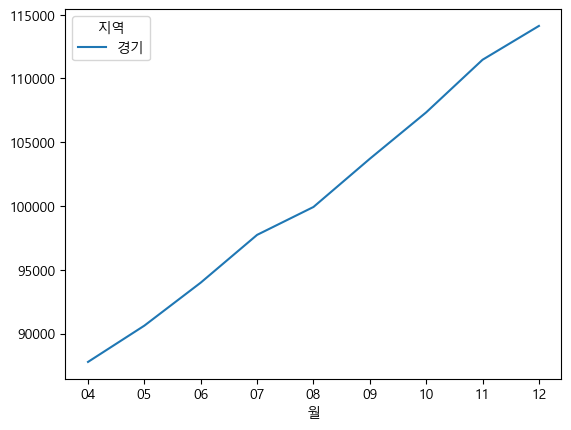

In [56]:
temp.plot()

In [57]:
tot_2023.head()

월,04,05,06,07,08,09,10,11,12
지역,,,,,,,,,
강원,15218.0,15728.0,16143.0,16459.0,16723.0,17014.0,17363.0,17927.0,18236.0
경기,87779.0,90624.0,93995.0,97738.0,99925.0,103704.0,107342.0,111466.0,114117.0
경남,26661.0,27593.0,28799.0,30888.0,31767.0,32763.0,34005.0,35124.0,36225.0
경북,22349.0,23023.0,23520.0,24347.0,24645.0,25051.0,25664.0,26234.0,26776.0
광주,10028.0,10303.0,10609.0,10853.0,11054.0,11318.0,11757.0,12235.0,12538.0


In [59]:
df_melt['지역'].unique()

array(['서울', '인천', '경기', '강원', '충북', '충남', '대전', '세종', '경북', '대구', '전북',
       '전남', '광주', '경남', '부산', '울산', '제주'], dtype=object)

검색 가능한 지역들: ['서울', '인천', '경기', '강원', '충북', '충남', '대전', '세종', '경북', '대구', '전북', '전남', '광주', '경남', '부산', '울산', '제주']


<Axes: title={'center': '서울 전기차 현황'}, xlabel='월'>

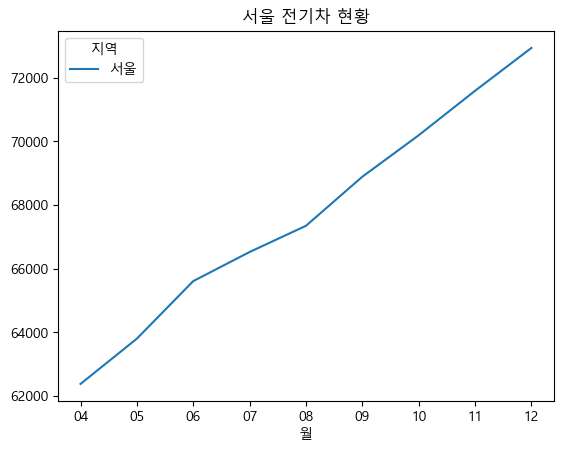

In [65]:
# 이제 지역을 입력받아 만들어 보자!

sidata=list(df_melt['지역'].unique())
print(f'검색 가능한 지역들: {sidata}')
searchin=input("지역 입력 >> ")
temp=tot_2023[tot_2023.index==searchin]
temp=temp.T
temp.plot(title=searchin+' 전기차 현황')